# Isabelle Arseneau-Bruneau  
## P-Hacking Analysis

### Reminder of Jupyter Notebook Commands 
**enter** – (in command mode) enter edit mode\
**shift+enter** – (in edit mode) execute current cell\
**esc** – (in edit mode) enter command mode, so you can use arrow keys to move to other cells\
**b** – (in command mode) insert empty cell below\
**x** – (in command mode) cut current cell\
**v** – (in command mode) paste the cell you’ve cut\
**esc+m/y** – change current code cell to markdown cell / reverse\
For all commands see “Help” - “Keyboard shortcuts” in the toolbar.

## Requirements and Recreating the Virtual Environment 
For this analysis, we assume that you have a standard Python environment (numpy, scipy, matplotlib) installed on your computer. (If this is not the case, refer to python installation instruction found here https://school.brainhackmtl.org/setup/.)  

We first need to recreate the virtual environment by importing the modules and librairy listed in the command below:

In [1]:
import pandas as pd #this means that pandas is called as "pd" to make shorter
import os
import random as rd
import numpy as np #numpy is called as "np" to make shorter
import matplotlib.pyplot as plt #pyplot is called as "plt" to make shorter
from scipy import stats #as sst sometimes (statsmodels)* 
#from statsmodels.formula.api import ols
#import Seaborn #to verify*

## ACKNOWLEDGEMENT: 
This notebook is based on J.-B. Poline's Jupyter Notebook "Intro-to-stat" presented during the Brainhack School 2020, Introduction to Statistics Lecture, Montreal, May 14th 2020

## Statistical Analysis Procedures

As a research question, we are interested to see if the number of conflicts experienced by participants during a segment of the COVID confinement (y-variable 'partY') may have been influenced by ext the participant's Gender, Verbal IQ, MRI_Count, or alchool intake during the same period (y-variable 'partY2'). 

__'partY'__ is measured as the number of conflicts reported during the 6th week of the COVID confinement\
__'partY2'__ is measured as the number of standard alchool intake (as defined by Educalcool, for details see reference below) reported by participants for the period covering the 6th week of the COVID confinement

Éduc’alcool (Association). (2007). Alcool et santé: Les niveaux de consommation d’alcool à faible risque, 2-3-4-5-0. Éduc’Alcool.

Statistical analysis where conducted on "My-super-Macbook-Pro-that-fits-in-an-envoloppe" with the software packages described above in the "Requirements" section.



In [2]:
#First, load the file containing the brain images: brainsize.csv

csvfile = ('/Users/isabellearseneau-bruneau/Desktop/Arseneau-Bruneau-I-QLSC612/course-2020-assessments/practical/brainsize.csv')

data = pd.read_csv(csvfile,sep=';', index_col=0) 
#Create pandas dataframe for the brainsize csv file and named this data "data"
#(sep indicate the separation in the dataframe, index_col=0 
#indicates what header's index column to refer when manipulating the data)
#(If you remove "index_col=0" you will have another column preceeding the first
#column that will identify the first rows as 0, 1, 2, 3, etc.) 

data.head() #Prints the headers of the file called "data"

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


Notice that there is a dot ('.') in weight of the second subject, indicating incomplete data. \
This will cause problems, so we will need to replace "." values with NaN to further conduct the analysis

In [3]:
#We will use the command
#data = pandas.read_csv(csvfile, sep=';', na_values=".") with pandas as pd

data = pd.read_csv(csvfile, sep=';', na_values=".")
data.head(3) #this new dataframe uses na and drop "." 
# you can also drop subjects having NaN data with the command $data.dropna().head(3)
# But this may reduce your dataset considerably (there are other alternative to that)

#(Notice the added column at the beginning as we did not specify the index column)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437


Let's examine the file "data" (e.g., shape, number of columns, rows, etc.)

In [43]:
print('data.shape: ', data.shape) #Will indicate (number of rows, number of columns)
print('data.columns: ', data.columns)  #Will indicate what each column header is 

data.describe()
#This will provide an output that summarize each variable  

data.shape:  (40, 10)
data.columns:  Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count', 'partY', 'partY2'],
      dtype='object')


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01,40.000000,40.000000
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05,17.525000,15.800000
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04,10.010219,10.168327
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05,1.000000,0.000000
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05,10.000000,8.000000
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05,18.000000,14.500000
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05,26.250000,26.250000
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06,32.000000,32.000000


## Adding New Variables of Random Numbers (Noise) to our Dataframe
Now, we will add two colums to the file brainsize.csv (the dataframe we called data).\

We first need to insert a new variable (of random noise) called "partY" that represents the number of conflicts a subject had during the 6th week of COVID-19 confinement. (Our AMAZING innovative methods have demonstrated that \
our random noise generator provides the most reliable data, see Assagn Ment Needs, et al. 2020) 

__Careful here__, you will need to use a __random seed__ in order to "fix" the random values obtained from the random number generator so that you don't have a different set of numbers every time your run your command. This will be done by calling the number of a specific random seed when using the number generator.  

If you are generating random noise (random values) for more than one variable, __different random seed__ will be needed in order to have different values (e.g. for your "partY and "partY2" arrays). 

For more information, see https://pynative.com/python-random-seed/

In [5]:
#We will use the following structure to add our columns arays  
#partY_values = []
#for i in range(num_rows): 
#    i = rd.randint(0,32) #here range (min, max)
#    partY_values.append(i)

import random as rd #This import a random number generator module
rd.seed(2) #This will fix the random seed (of the random number generator)

partY_values = [] #This is creating a new array called "partY" 
for i in range(40): #This is creating a loop for the 40 rows of the new array
    i = rd.randint(0,32) # a random number is assigned for each row (i)
    partY_values.append(i)#partY_values is now full with random values between 0 and 32

#Now, we need to create new column in data (our dataframe) and assign partY-values to it
data['partY'] = partY_values
#print(partY_values.append(i)) can allow you to verify

data.head() #More visually appealing command, (40) give full frame instead of 6 rows

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
0,1,Female,133,132,124,118.0,64.5,816932,3
1,2,Male,140,150,124,NaN,72.5,1001121,5
2,3,Male,139,123,150,143.0,73.3,1038437,5
3,4,Male,133,129,128,172.0,68.8,965353,23
4,5,Female,137,132,134,147.0,65.0,951545,10


Now, we will add the other new variable, "partY2" that represents represents the number of 
alcohol intake during the 6th week of COVID-19 confinement for the same subjects

In [6]:
#Using the same structure as above: 

rd.seed(26) #This a different random seed which "fix" the random values generated

partY2_values = [] #Creates new array called "partY2" 
for i in range(40): #Createsa loop for the 40 rows of array "partY2"
    i = rd.randint(0,32) #random number assigned for each row (i)
    partY2_values.append(i)#partY2_values now filed with random values between 0 and 32

#To create this new column in data (our dataframe) and assign partY2-values to it
data['partY2'] = partY2_values
#print(partY2_values.append(i)) can allow you to verify

data.head() #Verify the resulting dataframe

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
0,1,Female,133,132,124,118.0,64.5,816932,3,12
1,2,Male,140,150,124,NaN,72.5,1001121,5,13
2,3,Male,139,123,150,143.0,73.3,1038437,5,27
3,4,Male,133,129,128,172.0,68.8,965353,23,3
4,5,Female,137,132,134,147.0,65.0,951545,10,8


### Verifying Data Types

In [7]:
#Now that we have our full dataframe, let's check each data types
data.dtypes

Unnamed: 0      int64
Gender         object
FSIQ            int64
VIQ             int64
PIQ             int64
Weight        float64
Height        float64
MRI_Count       int64
partY           int64
partY2          int64
dtype: object

we are confirming that each variable seem to fit with the right data type 

### Data Screening
Because we aim to be "the worlds'greatest researchers", we will only consider subjects that \
have complete data and drop the missing data. 

_(It is too bad here that the researchers in question did not watch the Intro-to-stats lecture \
of the BHS2020. They would have known that this operation reduce their sample size, which affect 
their Degree of freedom and results.)_

In [ ]:
data.dropna() #This will remove the subjects with incomplete data 
data.head(40) # To inspect differences

In [42]:
print('data.shape: ', data.shape) #Will indicate (number of rows, number of columns)
print('data.columns: ', data.columns)  #Will indicate what each column header is 
print('\nFemale partY mean: ', data[data['Gender'] == 'Female']['partY'].mean())
print('\nMale partY mean: ', data[data['Gender'] == 'Male']['partY'].mean())

#Example of command to get the mean of a group associated with a category variable
#e.g. here the mean of the partY, selecting only the female subjects, and then only the male subjects

data.describe()
#This will provide an output that summarize each variable  

data.shape:  (40, 10)
data.columns:  Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count', 'partY', 'partY2'],
      dtype='object')

Female partY mean:  16.8

Male partY mean:  18.25


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01,40.000000,40.000000
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05,17.525000,15.800000
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04,10.010219,10.168327
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05,1.000000,0.000000
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05,10.000000,8.000000
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05,18.000000,14.500000
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05,26.250000,26.250000
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06,32.000000,32.000000


In [22]:
#For our research question, group by gender (check lecture 23:43)
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [23]:
 groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['partY']:
    print((gender, value.mean()))

('Female', 16.8)
('Male', 18.25)


In [24]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['partY2']:
    print((gender, value.mean()))

('Female', 14.4)
('Male', 17.2)


In [25]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
Gender,,,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6,16.80,14.4
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4,18.25,17.2


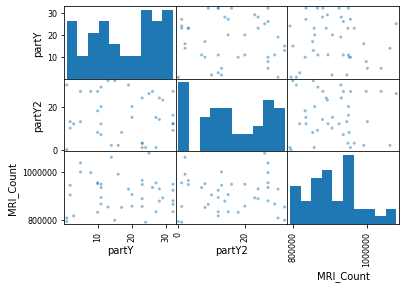

In [26]:
from pandas import plotting as pdplt
pdplt.scatter_matrix(data[['partY', 'partY2', 'MRI_Count']]);

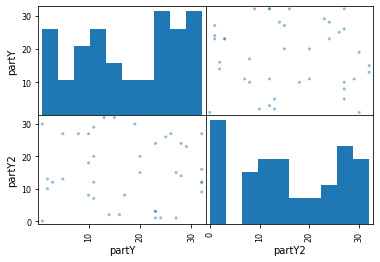

In [27]:
from pandas import plotting as pdplt
pdplt.scatter_matrix(data[['partY', 'partY2']]);

In [28]:
from scipy import stats

female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [29]:
female_MRI_Count = data[data['Gender'] == 'Female']['MRI_Count']
male_MRI_Count = data[data['Gender'] == 'Male']['MRI_Count']
stats.ttest_ind(female_MRI_Count, male_MRI_Count)

Ttest_indResult(statistic=-5.215594290396395, pvalue=6.757994867071175e-06)

In [30]:
female_partY = data[data['Gender'] == 'Female']['partY']
male_partY = data[data['Gender'] == 'Male']['partY']
stats.ttest_ind(female_partY, male_partY)

Ttest_indResult(statistic=-0.45337265627602474, pvalue=0.6528588899976295)

In [31]:
female_partY2 = data[data['Gender'] == 'Female']['partY2']
male_partY2 = data[data['Gender'] == 'Male']['partY2']
stats.ttest_ind(female_partY2, male_partY2)

Ttest_indResult(statistic=-0.868023528325037, pvalue=0.39083044414047874)

{'Female': Int64Index([0, 4, 5, 6, 7, 10, 13, 14, 15, 16, 18, 22, 24, 26, 28, 29, 30, 34,
             35, 37],
            dtype='int64'),
 'Male': Int64Index([1, 2, 3, 8, 9, 11, 12, 17, 19, 20, 21, 23, 25, 27, 31, 32, 33, 36,
             38, 39],
            dtype='int64')}

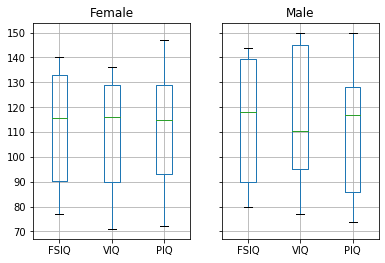

In [32]:
# Box plots of different columns for each gender
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
groupby_gender.groups


{'Female': Int64Index([0, 4, 5, 6, 7, 10, 13, 14, 15, 16, 18, 22, 24, 26, 28, 29, 30, 34,
             35, 37],
            dtype='int64'),
 'Male': Int64Index([1, 2, 3, 8, 9, 11, 12, 17, 19, 20, 21, 23, 25, 27, 31, 32, 33, 36,
             38, 39],
            dtype='int64')}

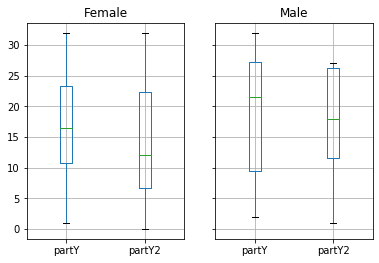

In [35]:
# Box plots of different columns for each gender
groupby_gender.boxplot(column=['partY', 'partY2'])
groupby_gender.groups


In [38]:
from statsmodels.formula.api import ols

model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
print(model.summary())

# Here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.
# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
print(model.f_test([0, 1, 0, 0]))

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0184
Time:                        19:39:00   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

In [39]:
from statsmodels.formula.api import ols

model = ols('partY ~ Gender + MRI_Count + VIQ', data).fit()
print(model.summary())

# Here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.
# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
print(model.f_test([0, 1, 0, 0]))

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.1639
Date:                Sun, 31 May 2020   Prob (F-statistic):              0.920
Time:                        19:47:24   Log-Likelihood:                -148.12
No. Observations:                  40   AIC:                             304.2
Df Residuals:                      36   BIC:                             311.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.8688     26.033      1.

In [ ]:
#DataFrame.corr(self, method='pearson', min_periods=1) 